In [1]:
#Importing the necessary Libraries:

import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


#suppressing warnings:

import warnings
warnings.filterwarnings('ignore')


### Read the dataset:

In [2]:
current_directory = os.getcwd()
current_directory

'C:\\Users\\Sachin-W10\\Downloads\\iit_b_DS\\Samrudi _code\\Dataset'

In [3]:
folder_name = 'dataset'
file_name = 'listings.csv'
file_name

'listings.csv'

In [4]:
# Construct the full file path
file_path = os.path.join(current_directory, folder_name, file_name)

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,761411,Condo in Amsterdam · ★4.74 · 1 bedroom · 1 bed...,4013546,Xsjong,NaN,Noord-Oost,52.40164,4.95106,Private room,61,3,303,2023-08-19,2.30,2,272,26,0363 D4AD DCF3 E72A 56A2
1,768274,Rental unit in Amsterdam · ★4.83 · 1 bedroom ·...,3678216,J & R,NaN,Westerpark,52.38855,4.88521,Entire home/apt,327,3,78,2023-08-16,0.64,1,16,6,0363 7A50 18E7 51D1 B7F9
2,768737,Boat in Amsterdam · ★4.82 · 1 bedroom · 1 bed ...,3877342,Nicole,NaN,Westerpark,52.37824,4.86826,Private room,109,2,341,2023-08-24,2.73,3,29,43,036396BE30827DDB9575
3,771217,Houseboat in Amsterdam · ★5.0 · 3 bedrooms · 3...,4068486,Danielle,NaN,Zuid,52.34091,4.84802,Entire home/apt,290,3,10,2019-01-02,0.11,1,0,0,0363 D807 AD6C 499A F871
4,771343,Rental unit in Amsterdam · ★4.89 · 1 bedroom ·...,2313061,Marcel,NaN,Centrum-West,52.37641,4.88303,Private room,150,1,699,2023-09-01,6.62,2,196,110,0363 8C61 E9B9 5582 913E


In [5]:
df.shape

(8386, 18)

In [6]:
df.isnull().sum()

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group               8386
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                        830
reviews_per_month                  830
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                             18
dtype: int64

In [7]:
df.reviews_per_month.fillna(0,inplace=True)
df.isnull().sum()

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group               8386
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                        830
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                             18
dtype: int64

In [8]:
# droping the null value
df.drop(['neighbourhood_group','last_review','license'],axis=1,inplace=True)
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

In [9]:
null_mask = df.isnull().any(axis=1)
null_rows = df[null_mask]

null_rows.head(1)


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm


In [10]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm'],
      dtype='object')

In [11]:
df['rename']=df.name.apply(lambda x:x.split("Â·")[0])
df.head(1)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,rename
0,761411,Condo in Amsterdam · ★4.74 · 1 bedroom · 1 bed...,4013546,Xsjong,Noord-Oost,52.40164,4.95106,Private room,61,3,303,2.3,2,272,26,Condo in Amsterdam · ★4.74 · 1 bedroom · 1 bed...


In [12]:
df['Hotel_name']=df.name.apply(lambda x:x.split("·")[0])
df.head(1)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,rename,Hotel_name
0,761411,Condo in Amsterdam · ★4.74 · 1 bedroom · 1 bed...,4013546,Xsjong,Noord-Oost,52.40164,4.95106,Private room,61,3,303,2.3,2,272,26,Condo in Amsterdam · ★4.74 · 1 bedroom · 1 bed...,Condo in Amsterdam


In [13]:
df['Hotel_Review']=df.name.apply(lambda x:x.split("·")[1])
df.head(1)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,rename,Hotel_name,Hotel_Review
0,761411,Condo in Amsterdam · ★4.74 · 1 bedroom · 1 bed...,4013546,Xsjong,Noord-Oost,52.40164,4.95106,Private room,61,3,303,2.3,2,272,26,Condo in Amsterdam · ★4.74 · 1 bedroom · 1 bed...,Condo in Amsterdam,★4.74


In [14]:
df['Bedroom_Booked']=df.name.apply(lambda x:x.split("·")[2])
df['Bedroom_Booked']=df.Bedroom_Booked.apply(lambda x:x.split(" ")[1])
df.head(1)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,rename,Hotel_name,Hotel_Review,Bedroom_Booked
0,761411,Condo in Amsterdam · ★4.74 · 1 bedroom · 1 bed...,4013546,Xsjong,Noord-Oost,52.40164,4.95106,Private room,61,3,303,2.3,2,272,26,Condo in Amsterdam · ★4.74 · 1 bedroom · 1 bed...,Condo in Amsterdam,★4.74,1


In [15]:
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
rename                            0
Hotel_name                        0
Hotel_Review                      0
Bedroom_Booked                    0
dtype: int64

In [16]:
df.drop(['id','name','rename'],axis=1,inplace=True)
df.head(2)

,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,Hotel_name,Hotel_Review,Bedroom_Booked
0,4013546,Xsjong,Noord-Oost,52.40164,4.95106,Private room,61,3,303,2.30,2,272,26,Condo in Amsterdam,★4.74,1
1,3678216,J & R,Westerpark,52.38855,4.88521,Entire home/apt,327,3,78,0.64,1,16,6,Rental unit in Amsterdam,★4.83,1


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8386 entries, 0 to 8385
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         8386 non-null   int64  
 1   host_name                       8386 non-null   object 
 2   neighbourhood                   8386 non-null   object 
 3   latitude                        8386 non-null   float64
 4   longitude                       8386 non-null   float64
 5   room_type                       8386 non-null   object 
 6   price                           8386 non-null   int64  
 7   minimum_nights                  8386 non-null   int64  
 8   number_of_reviews               8386 non-null   int64  
 9   reviews_per_month               8386 non-null   float64
 10  calculated_host_listings_count  8386 non-null   int64  
 11  availability_365                8386 non-null   int64  
 12  number_of_reviews_ltm           83

In [18]:

df.Hotel_Review.unique()

array([' ★4.74 ', ' ★4.83 ', ' ★4.82 ', ' ★5.0 ', ' ★4.89 ', ' ★4.60 ',
       ' ★4.78 ', ' ★4.90 ', ' ★4.44 ', ' ★4.93 ', ' ★4.87 ', ' ★4.81 ',
       ' ★4.72 ', ' 2 bedrooms ', ' ★4.92 ', ' ★4.88 ', ' ★4.95 ',
       ' ★4.86 ', ' ★4.91 ', ' ★4.77 ', ' ★4.51 ', ' ★4.63 ', ' ★4.75 ',
       ' ★4.76 ', ' ★4.50 ', ' ★4.59 ', ' ★4.56 ', ' ★4.79 ', ' ★4.46 ',
       ' ★4.96 ', ' ★4.70 ', ' ★4.71 ', ' ★4.85 ', ' ★4.94 ', ' ★4.55 ',
       ' ★4.68 ', ' 3 bedrooms ', ' ★4.62 ', ' ★4.80 ', ' ★4.98 ',
       ' 1 bedroom ', ' ★4.33 ', ' ★4.84 ', ' ★4.41 ', ' ★4.64 ',
       ' ★4.97 ', ' ★4.53 ', ' ★4.57 ', ' ★4.36 ', ' ★4.73 ', ' ★4.66 ',
       ' ★4.67 ', ' ★4.99 ', ' ★4.69 ', ' ★4.40 ', ' ★4.61 ', ' ★4.29 ',
       ' ★4.65 ', ' ★4.42 ', ' ★4.48 ', ' ★4.19 ', ' ★New ', ' ★4.52 ',
       ' ★4.14 ', ' ★4.43 ', ' ★4.58 ', ' ★4.0 ', ' ★4.47 ', ' ★4.30 ',
       ' ★4.37 ', ' ★4.34 ', ' 4 bedrooms ', ' ★4.54 ', ' 5 bedrooms ',
       ' ★4.45 ', ' ★4.49 ', ' ★4.39 ', ' ★3.91 ', ' Studio ', ' ★4.35 ',


In [19]:

filtered_df = df[df['Hotel_Review'].str.contains('bed', case=False, na=False)]
filtered_df.head(2)

,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,Hotel_name,Hotel_Review,Bedroom_Booked
14,220434,Vesna & Misha,Buitenveldert - Zuidas,52.327808,4.87680,Entire home/apt,269,5,1,0.67,1,13,1,Rental unit in Amsterdam,2 bedrooms,2
73,1250588,Hannah,Oostelijk Havengebied - Indische Buurt,52.366169,4.93843,Entire home/apt,201,4,1,1.00,1,263,1,Rental unit in Amsterdam,3 bedrooms,3


In [20]:
df.loc[df['Hotel_Review'].str.contains('bed|Studio|New', case=False, na=False), 'Hotel_Review'] = 0
df.head(2)

,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,Hotel_name,Hotel_Review,Bedroom_Booked
0,4013546,Xsjong,Noord-Oost,52.40164,4.95106,Private room,61,3,303,2.30,2,272,26,Condo in Amsterdam,★4.74,1
1,3678216,J & R,Westerpark,52.38855,4.88521,Entire home/apt,327,3,78,0.64,1,16,6,Rental unit in Amsterdam,★4.83,1


In [21]:
df[df['Hotel_Review'].str.contains('bed', case=False, na=False)].head(2)

,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,Hotel_name,Hotel_Review,Bedroom_Booked


In [22]:
df.Hotel_Review.unique()

array([' ★4.74 ', ' ★4.83 ', ' ★4.82 ', ' ★5.0 ', ' ★4.89 ', ' ★4.60 ',
       ' ★4.78 ', ' ★4.90 ', ' ★4.44 ', ' ★4.93 ', ' ★4.87 ', ' ★4.81 ',
       ' ★4.72 ', 0, ' ★4.92 ', ' ★4.88 ', ' ★4.95 ', ' ★4.86 ',
       ' ★4.91 ', ' ★4.77 ', ' ★4.51 ', ' ★4.63 ', ' ★4.75 ', ' ★4.76 ',
       ' ★4.50 ', ' ★4.59 ', ' ★4.56 ', ' ★4.79 ', ' ★4.46 ', ' ★4.96 ',
       ' ★4.70 ', ' ★4.71 ', ' ★4.85 ', ' ★4.94 ', ' ★4.55 ', ' ★4.68 ',
       ' ★4.62 ', ' ★4.80 ', ' ★4.98 ', ' ★4.33 ', ' ★4.84 ', ' ★4.41 ',
       ' ★4.64 ', ' ★4.97 ', ' ★4.53 ', ' ★4.57 ', ' ★4.36 ', ' ★4.73 ',
       ' ★4.66 ', ' ★4.67 ', ' ★4.99 ', ' ★4.69 ', ' ★4.40 ', ' ★4.61 ',
       ' ★4.29 ', ' ★4.65 ', ' ★4.42 ', ' ★4.48 ', ' ★4.19 ', ' ★4.52 ',
       ' ★4.14 ', ' ★4.43 ', ' ★4.58 ', ' ★4.0 ', ' ★4.47 ', ' ★4.30 ',
       ' ★4.37 ', ' ★4.34 ', ' ★4.54 ', ' ★4.45 ', ' ★4.49 ', ' ★4.39 ',
       ' ★3.91 ', ' ★4.35 ', ' ★4.27 ', ' ★4.32 ', ' ★4.31 ', ' ★4.38 ',
       ' ★3.83 ', ' ★4.25 ', ' ★4.21 ', ' ★4.08 ', ' ★4.09 ',

In [23]:
r_bb = df.Bedroom_Booked.mode
r_bb

<bound method Series.mode of 0       1
1       1
2       1
3       3
4       1
       ..
8381    1
8382    3
8383    1
8384    1
8385    2
Name: Bedroom_Booked, Length: 8386, dtype: object>

In [24]:
df.Bedroom_Booked.fillna(r_bb,inplace=True)
df.Bedroom_Booked.isnull().sum()

0

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8386 entries, 0 to 8385
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         8386 non-null   int64  
 1   host_name                       8386 non-null   object 
 2   neighbourhood                   8386 non-null   object 
 3   latitude                        8386 non-null   float64
 4   longitude                       8386 non-null   float64
 5   room_type                       8386 non-null   object 
 6   price                           8386 non-null   int64  
 7   minimum_nights                  8386 non-null   int64  
 8   number_of_reviews               8386 non-null   int64  
 9   reviews_per_month               8386 non-null   float64
 10  calculated_host_listings_count  8386 non-null   int64  
 11  availability_365                8386 non-null   int64  
 12  number_of_reviews_ltm           83

In [26]:
# changing the data type for Bedroom_Booked
df["Bedroom_Booked"] = pd.to_numeric(df['Bedroom_Booked'], errors='coerce').astype('float64')
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8386 entries, 0 to 8385
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         8386 non-null   int64  
 1   host_name                       8386 non-null   object 
 2   neighbourhood                   8386 non-null   object 
 3   latitude                        8386 non-null   float64
 4   longitude                       8386 non-null   float64
 5   room_type                       8386 non-null   object 
 6   price                           8386 non-null   int64  
 7   minimum_nights                  8386 non-null   int64  
 8   number_of_reviews               8386 non-null   int64  
 9   reviews_per_month               8386 non-null   float64
 10  calculated_host_listings_count  8386 non-null   int64  
 11  availability_365                8386 non-null   int64  
 12  number_of_reviews_ltm           83

In [27]:
df.isnull().sum()

host_id                             0
host_name                           0
neighbourhood                       0
latitude                            0
longitude                           0
room_type                           0
price                               0
minimum_nights                      0
number_of_reviews                   0
reviews_per_month                   0
calculated_host_listings_count      0
availability_365                    0
number_of_reviews_ltm               0
Hotel_name                          0
Hotel_Review                        0
Bedroom_Booked                    228
dtype: int64

In [28]:
r_bb = df.Bedroom_Booked.mode
r_bb

<bound method Series.mode of 0       1.0
1       1.0
2       1.0
3       3.0
4       1.0
       ... 
8381    1.0
8382    3.0
8383    1.0
8384    1.0
8385    2.0
Name: Bedroom_Booked, Length: 8386, dtype: float64>

In [29]:
df.Bedroom_Booked.fillna(1,inplace=True)
df.Bedroom_Booked.isnull().sum()

0

In [30]:
df.isnull().sum()

host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
Hotel_name                        0
Hotel_Review                      0
Bedroom_Booked                    0
dtype: int64

In [31]:
df.neighbourhood.unique()

array(['Noord-Oost', 'Westerpark', 'Zuid', 'Centrum-West', 'Slotervaart',
       'Centrum-Oost', 'Oostelijk Havengebied - Indische Buurt',
       'Buitenveldert - Zuidas', 'IJburg - Zeeburgereiland', 'Oud-Oost',
       'De Pijp - Rivierenbuurt', 'De Baarsjes - Oud-West',
       'Bos en Lommer', 'Watergraafsmeer', 'Oud-Noord', 'Noord-West',
       'Geuzenveld - Slotermeer', 'De Aker - Nieuw Sloten', 'Osdorp',
       'Bijlmer-Centrum', 'Gaasperdam - Driemond', 'Bijlmer-Oost'],
      dtype=object)

In [32]:
df.neighbourhood.nunique()

22

In [33]:
len(df.neighbourhood.unique())

22

In [34]:
df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Hotel room', 'Shared room'],
      dtype=object)

In [35]:
df.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,Bedroom_Booked
count,8.386000e+03,8386.000000,8386.000000,8386.000000,8386.000000,8386.000000,8386.000000,8386.000000,8386.000000,8386.000000,8386.000000
mean,1.077878e+08,52.366603,4.889834,254.489864,5.046625,45.437753,1.059332,1.831624,82.825066,10.848080,1.594801
std,1.448316e+08,0.017191,0.035403,395.468275,34.710395,107.352805,2.167880,2.857336,113.568083,30.815465,1.031648
min,3.159000e+03,52.290340,4.755870,18.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,1.025536e+07,52.355640,4.865501,150.000000,2.000000,3.000000,0.200000,1.000000,0.000000,0.000000,1.000000
50%,3.642318e+07,52.365769,4.887580,207.000000,3.000000,10.000000,0.490000,1.000000,18.000000,3.000000,1.000000
75%,1.444334e+08,52.376440,4.908708,300.000000,4.000000,36.000000,1.110000,1.000000,142.000000,8.000000,2.000000
max,5.349544e+08,52.425159,5.026430,27857.000000,1001.000000,3199.000000,120.110000,27.000000,365.000000,1689.000000,30.000000


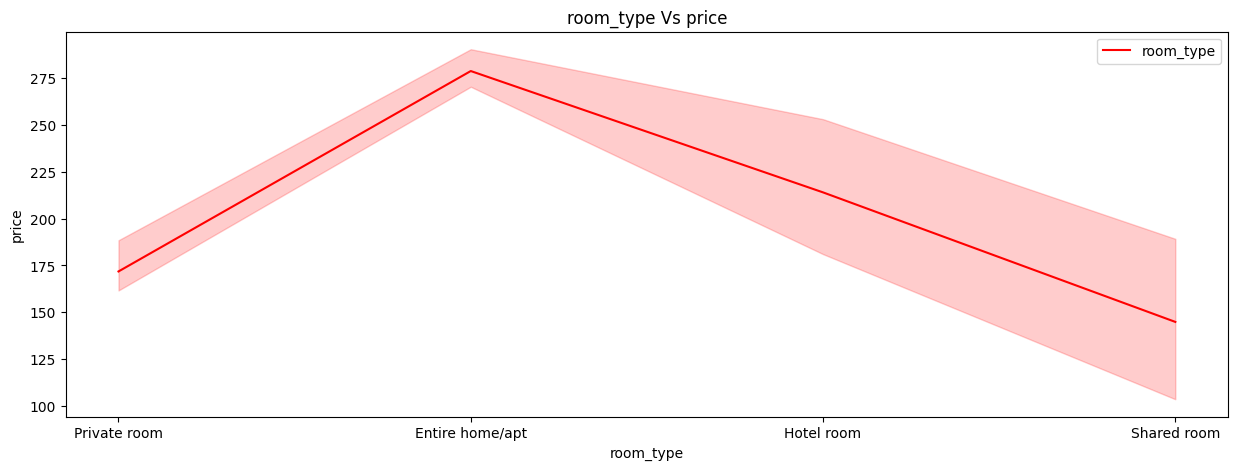

In [36]:
# Line chart showing Risk vs Annualized_Return of stocks

plt.figure(figsize=(15,5))
sns.lineplot(x=df['room_type'],y=df['price'], label="room_type",color='Red')

plt.xticks(rotation=0)

# Add label for horizontal axis
plt.title("room_type Vs price")
#plt.legend()

plt.show()

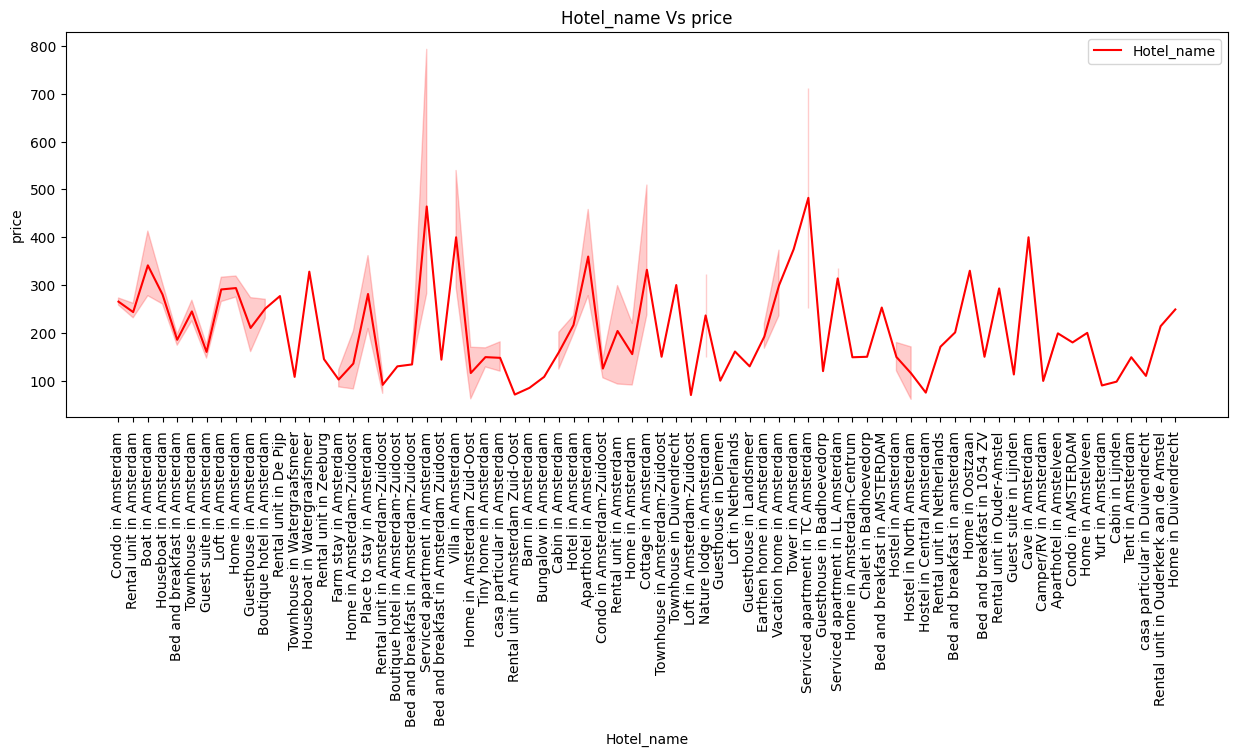

In [37]:
# Line chart showing Risk vs Annualized_Return of stocks

plt.figure(figsize=(15,5))
sns.lineplot(x=df['Hotel_name'],y=df['price'], label="Hotel_name",color='Red')

plt.xticks(rotation=90)

# Add label for horizontal axis
plt.title("Hotel_name Vs price")
#plt.legend()

plt.show()

In [38]:
# COPY FILE AND SAVE 

df.to_csv('Airbnb_file.csv',index=False)


In [39]:
df['neighbourhood'].values

array(['Noord-Oost', 'Westerpark', 'Westerpark', ..., 'Bos en Lommer',
       'Centrum-West', 'De Pijp - Rivierenbuurt'], dtype=object)

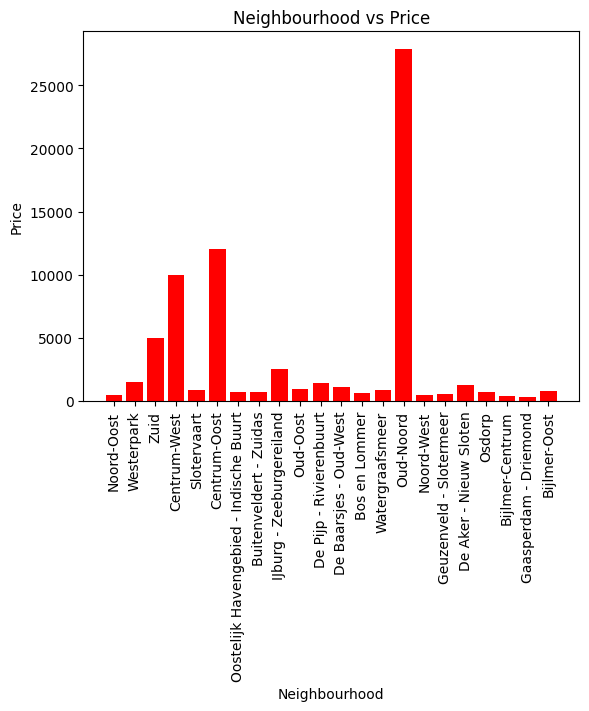

In [40]:

plt.bar(x=df['neighbourhood'], height=df['price'], color='red')
plt.xticks(rotation=90)

# Add labels and title
plt.xlabel('Neighbourhood')
plt.ylabel('Price')
plt.title('Neighbourhood vs Price')

# Show the plot
plt.show()


In [41]:
area_review=df.groupby(['neighbourhood'])['number_of_reviews'].max()
area_review

neighbourhood
Bijlmer-Centrum                            590
Bijlmer-Oost                               339
Bos en Lommer                              440
Buitenveldert - Zuidas                     424
Centrum-Oost                              1173
Centrum-West                              1020
De Aker - Nieuw Sloten                     541
De Baarsjes - Oud-West                    2106
De Pijp - Rivierenbuurt                    782
Gaasperdam - Driemond                      420
Geuzenveld - Slotermeer                    370
IJburg - Zeeburgereiland                   466
Noord-Oost                                 567
Noord-West                                 418
Oostelijk Havengebied - Indische Buurt     704
Osdorp                                    3199
Oud-Noord                                  793
Oud-Oost                                  1410
Slotervaart                                643
Watergraafsmeer                            355
Westerpark                                 559